In [ ]:
# only in docker
%cd ~/src/laboratori/2122

# **Introduzione al Machine Learning -- laboratorio 19 e 20**

- Regressione logistica
- Pytorch

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('body.xlsx', index_col=0)
df.head()

,Biacromial diameter (see Fig. 2),"Biiliac diameter, or ""pelvic breadth"" (see Fig. 2)",Bitrochanteric diameter (see Fig. 2),"Chest depth between spine and sternum at nipple level,","Chest diameter at nipple level, mid-expiration","Elbow diameter, sum of two elbows","Wrist diameter, sum of two wrists","Knee diameter, sum of two knees","Ankle diameter, sum of two ankles",Shoulder girth over deltoid muscles,...,"Bicep girth, flexed, average of right and left girths","Forearm girth, extended, palm up, average of right and","Knee girth over patella, slightly flexed position, average","Calf maximum girth, average of right and left girths","Ankle minimum girth, average of right and left girths","Wrist minimum girth, average of right and left girths",Age (years),Weight (kg),Height (cm),"Gender (1 - male, 0 - female)"
Id,,,,,,,,,,,,,,,,,,,,,
1,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
2,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
3,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
4,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
5,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1


In [5]:
# Libreria standard per regressione logistica

from sklearn.linear_model import LogisticRegression

X = df.drop(columns='Gender (1 - male, 0 - female)')
y = df['Gender (1 - male, 0 - female)']

model = LogisticRegression(penalty=None).fit(X=X, y=y)

/opt/homebrew/Caskroom/miniconda/base/envs/machine-learning/lib/python3.11/site-packages/sklearn/utils/_param_validation.py:14: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.0)
  from scipy.sparse import csr_matrix, issparse


In [6]:
model

LogisticRegression(penalty=None)

In [7]:
model.coef_

array([[ 43.59678536, -30.09449892,   6.72451241,   7.09659872,
        -14.1415722 ,  40.2960209 ,  21.17580908, -29.42871815,
         47.23879814,  -7.23057728,   3.8137938 ,  18.95284988,
        -24.7519052 ,  -8.34131365, -62.27705814,  19.30499548,
         37.70358756, -37.01592358, -67.23993937,  25.17149844,
          8.10819819,  -1.24373387,  42.05595735,  15.1620603 ]])

In [8]:
model.intercept_

array([-1.80752457])

In [9]:
X.iloc[0].values

array([ 42.9,  26. ,  31.5,  17.7,  28. ,  13.1,  10.4,  18.8,  14.1,
       106.2,  89.5,  71.5,  74.5,  93.5,  51.5,  32.5,  26. ,  34.5,
        36.5,  23.5,  16.5,  21. ,  65.6, 174. ])

In [10]:
model.coef_ @ X.iloc[0].values + model.intercept_

array([958.46154513])

In [11]:
model.predict_log_proba(X.iloc[0:2])

/opt/homebrew/Caskroom/miniconda/base/envs/machine-learning/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1458: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


array([[-inf,   0.],
       [-inf,   0.]])

In [12]:
model.score(X, y)

1.0

Forse siamo in overfitting, proviamo ad usare meno variabili

In [13]:
Xr = X.iloc[:, -5:]
Xr.head()

,"Ankle minimum girth, average of right and left girths","Wrist minimum girth, average of right and left girths",Age (years),Weight (kg),Height (cm)
Id,,,,,
1,23.5,16.5,21,65.6,174.0
2,24.5,17.0,23,71.8,175.3
3,21.9,16.9,28,80.7,193.5
4,23.0,16.6,23,72.6,186.5
5,24.4,18.0,22,78.8,187.2


In [14]:
modelr = LogisticRegression(penalty=None).fit(X=Xr, y=y)
modelr.score(Xr, y)

0.9191321499013807

In [15]:
t = modelr.predict_log_proba(Xr.iloc[0:2])
t

array([[-1.44170967, -0.26987233],
       [-2.32176132, -0.10325235]])

In [16]:
z = modelr.coef_ @ Xr.iloc[0].values + modelr.intercept_
z

array([1.17183734])

In [17]:
t[0,1] - t[0,0]

np.float64(1.1718373414890806)

In [18]:
modelr.predict_proba(Xr.iloc[0:2])

array([[0.23652304, 0.76347696],
       [0.09810065, 0.90189935]])

In [19]:
# Funzione sigmoide logistica
(1 / (1 + np.exp(-z)))

array([0.76347696])

In [20]:
# Come cambia con la regolarizzazione di default?
model_l2 = LogisticRegression(max_iter=5000).fit(X=X, y=y)
model_l2.score(X, y)

1.0

In [21]:
model_l2.coef_

array([[ 0.58341916, -0.37266708,  0.13580994,  0.23812767, -0.19283536,
         1.05692744,  0.33055334, -0.29209734,  1.12530681,  0.03684634,
         0.19953749,  0.56707925, -0.28765108, -0.17780219, -0.53921704,
         0.55497559,  1.00904623, -0.08204791, -0.70592404,  0.495081  ,
         0.04081308, -0.03666437, -0.2365196 ,  0.47582062]])

In [22]:
# Proviamo a fare la validazione

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y)

In [23]:
model_val = LogisticRegression(max_iter=1000).fit(X=X_train, y=y_train)
model_val.score(X_train, y_train), model_val.score(X_test, y_test)

(1.0, 0.987012987012987)

In [24]:
model_val.coef_

array([[ 0.78500544, -0.33852448,  0.01392559,  0.27873131, -0.1900081 ,
         0.79603085,  0.27092994, -0.30645025,  1.0710608 ,  0.1030269 ,
         0.13907863,  0.55320308, -0.20925664, -0.13043679, -0.53623912,
         0.36772577,  0.90773851,  0.04599768, -0.68145819,  0.24175277,
        -0.12088041, -0.08413462, -0.22203225,  0.44152789]])

In [25]:
multireg_filename = 'stin22-lab1718.xlsx'

dfm = pd.read_excel(multireg_filename, sheet_name='mtst0906.2', usecols='A:J', index_col=0)
dfm

,mpg,cylin,disp,hp,wt,accel,year,orig,name
id,,,,,,,,,
1.0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,Chevrolet Chevelle Malibu
2.0,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,Buick Skylark 320
3.0,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,Plymouth Satellite
4.0,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,Amc Rebel Sst
5.0,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,Ford Torino
...,...,...,...,...,...,...,...,...,...
403.0,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,Dodge Rampage
404.0,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,Ford Ranger
405.0,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,1.0,Chevy S-10


In [26]:
dfm = dfm.dropna().copy()
dfm

,mpg,cylin,disp,hp,wt,accel,year,orig,name
id,,,,,,,,,
1.0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,Chevrolet Chevelle Malibu
2.0,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,Buick Skylark 320
3.0,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,Plymouth Satellite
4.0,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,Amc Rebel Sst
5.0,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,Ford Torino
...,...,...,...,...,...,...,...,...,...
401.0,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,Ford Mustang Gl
402.0,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,Vw Pickup
403.0,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,Dodge Rampage


In [27]:
# Converto orig a intero per evitare problemi

dfm['orig'] = dfm['orig'].astype(int)

In [28]:
dfm

,mpg,cylin,disp,hp,wt,accel,year,orig,name
id,,,,,,,,,
1.0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,Chevrolet Chevelle Malibu
2.0,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,Buick Skylark 320
3.0,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,Plymouth Satellite
4.0,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,Amc Rebel Sst
5.0,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,Ford Torino
...,...,...,...,...,...,...,...,...,...
401.0,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1,Ford Mustang Gl
402.0,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2,Vw Pickup
403.0,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1,Dodge Rampage


In [29]:
Xm = dfm.iloc[:, :7]
ym = dfm['orig']

In [30]:
# Standardizzo Xm per avere dei coefficienti confrontabili
Xm = (Xm - Xm.mean()) / Xm.std()

In [31]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.15, stratify=ym)

In [32]:
model_m = LogisticRegression(max_iter=5000).fit(X=Xm_train, y=ym_train)
model_m.score(Xm_train, ym_train), model_m.score(Xm_test, ym_test)

(0.7650602409638554, 0.7627118644067796)

In [33]:
model_m.predict_log_proba(Xm_test.iloc[0:2])

array([[-1.76212527, -0.86827825, -0.89490384],
       [-2.243757  , -0.74839912, -0.86555639]])

In [34]:
model_m.predict_proba(Xm_test.iloc[0:2])

array([[0.17167961, 0.4196735 , 0.40864689],
       [0.10605929, 0.47312336, 0.42081735]])

In [35]:
model_m.coef_.T

array([[-0.50181181,  0.31457722,  0.18723459],
       [-0.3008016 , -0.06105337,  0.36185497],
       [ 3.42624508, -1.89608196, -1.53016312],
       [-0.79507134, -0.42440831,  1.21947965],
       [-0.46891162,  1.67015628, -1.20124466],
       [-0.04418876, -0.09074793,  0.13493668],
       [ 0.36181025, -0.51255036,  0.15074011]])

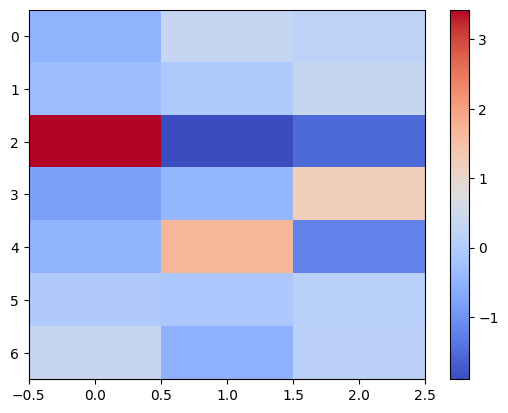

In [36]:
plt.imshow(model_m.coef_.T, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.show()

In [37]:
# Adesso rifacciamo in pytorch
import torch

zm_train = pd.get_dummies(ym_train, dtype=int)
zm_test = pd.get_dummies(ym_test, dtype=int)

Xt_train, Xt_test, zt_train, zt_test =  torch.tensor(Xm_train.values, dtype=torch.float), \
                                        torch.tensor(Xm_test.values, dtype=torch.float), \
                                        torch.tensor(zm_train.values, dtype=torch.float), \
                                        torch.tensor(zm_test.values, dtype=torch.float)

In [38]:
Xt_train

tensor([[-0.9518,  1.4794,  1.9624,  ...,  1.5292, -2.1876, -0.8072],
        [-1.3370,  1.4794,  1.4844,  ...,  2.0253, -0.3747, -0.5360],
        [ 2.9768, -0.8648, -1.0391,  ..., -1.0260,  0.8580,  1.0908],
        ...,
        [ 0.3834, -0.8648, -0.5229,  ..., -0.1303,  0.9305,  1.0908],
        [-0.7592,  0.3073,  0.6050,  ...,  0.2504,  0.8218,  0.0062],
        [-0.6951,  0.3073,  0.2896,  ...,  0.1656,  0.3504, -0.8072]])

In [39]:
Xt_train.shape[1], zt_train.shape[1]

(7, 3)

In [40]:
lin = torch.nn.Linear(Xt_train.shape[1], zt_train.shape[1])
lin

Linear(in_features=7, out_features=3, bias=True)

In [41]:
dir(lin)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__constants__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_compiled_call_impl',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_per

In [42]:
lin.weight

Parameter containing:
tensor([[-0.1614,  0.0835,  0.0257, -0.1700,  0.1196,  0.1592, -0.1880],
        [-0.0785, -0.3674,  0.1575,  0.0652,  0.1922, -0.2052,  0.1571],
        [ 0.3437, -0.0634,  0.1354,  0.1736,  0.0570, -0.2224, -0.1661]],
       requires_grad=True)

In [43]:
lin.bias

Parameter containing:
tensor([ 0.0425,  0.0981, -0.0179], requires_grad=True)

In [44]:
# Per ora il gradiente e' vuoto
lin.weight.grad is None

True

In [45]:
print(lin(Xt_train))
lin(Xt_train).shape

tensor([[-1.9762e-01,  7.6680e-01,  1.1004e+00],
        [ 5.0266e-01,  3.5216e-01,  1.2241e-01],
        [-5.5300e-01, -2.5037e-01,  3.1031e-01],
        [-1.0562e-01,  3.0644e-01, -2.2170e-01],
        [ 3.8497e-01,  4.9084e-02, -3.0022e-01],
        [ 4.1475e-01,  6.1613e-01,  6.5058e-01],
        [ 1.1646e-01,  1.9027e-01, -9.7257e-02],
        [ 3.5520e-01,  3.1472e-01,  5.3803e-01],
        [ 3.3412e-01,  3.8212e-01,  4.5323e-01],
        [-7.2307e-03, -3.1571e-02, -2.6362e-01],
        [ 2.4831e-01,  4.3833e-02, -5.2883e-01],
        [ 1.1462e-01,  4.0652e-01,  4.2727e-01],
        [ 1.1910e-01,  2.0720e-01,  4.0921e-01],
        [-3.5379e-02, -6.5750e-02,  3.6193e-01],
        [ 5.8134e-02,  3.7585e-01, -1.4774e-01],
        [-1.5607e-01,  4.4060e-02, -5.7943e-02],
        [-4.6661e-01,  3.5835e-01,  7.2063e-02],
        [-7.6144e-02, -9.7372e-02, -2.4441e-02],
        [ 3.4314e-01, -2.6863e-01, -5.0749e-01],
        [ 1.0215e-01,  2.2573e-01, -1.9850e-01],
        [ 5.2367e-01

torch.Size([332, 3])

In [46]:
criterion = torch.nn.CrossEntropyLoss()

In [47]:
# Qui usiamo tutto il dataset di training, quindi niente minibatch

loss = criterion(lin(Xt_train), zt_train)
loss

tensor(1.0986, grad_fn=<DivBackward1>)

In [48]:
loss.backward()

In [49]:
lin.weight.grad

tensor([[ 0.2478, -0.2807, -0.3126, -0.2563, -0.2791,  0.1835,  0.0339],
        [-0.0806,  0.1151,  0.1287,  0.0995,  0.1035, -0.0766,  0.0549],
        [-0.1672,  0.1657,  0.1840,  0.1568,  0.1756, -0.1069, -0.0887]])

In [50]:
lin.bias.grad

tensor([-0.2883,  0.1771,  0.1112])

In [51]:
# Introduco l'ottimizzatore SGD e scrivo il ciclo di ottimizzazione

optimizer = torch.optim.SGD(lin.parameters(), lr=0.01)

for epoch in range(5000):
    output = lin(Xt_train)
    outtest = lin(Xt_test).detach()

    test_loss = criterion(outtest, zt_test)
    train_accuracy = (output.detach().argmax(dim=1) == zt_train.argmax(dim=1)).float().mean()
    test_accuracy  = (outtest.argmax(dim=1) == zt_test.argmax(dim=1)).float().mean()
    optimizer.zero_grad()

    loss = criterion(output, zt_train)
    loss.backward()
    optimizer.step()
    print(f'{epoch}, train loss: {loss.item():g}, test loss: {test_loss:g}, train acc: {train_accuracy:g}, test acc: {test_accuracy:g}', flush=True)

0, train loss: 1.0986, test loss: 1.13792, train acc: 0.412651, test acc: 0.38983
1, train loss: 1.09092, test loss: 1.13005, train acc: 0.415663, test acc: 0.40678
2, train loss: 1.08344, test loss: 1.12237, train acc: 0.418675, test acc: 0.40678
3, train loss: 1.07616, test loss: 1.11489, train acc: 0.439759, test acc: 0.38983
4, train loss: 1.06906, test loss: 1.10759, train acc: 0.457831, test acc: 0.423729
5, train loss: 1.06216, test loss: 1.10047, train acc: 0.48494, test acc: 0.423729
6, train loss: 1.05544, test loss: 1.09353, train acc: 0.490964, test acc: 0.440678
7, train loss: 1.04889, test loss: 1.08676, train acc: 0.493976, test acc: 0.457627
8, train loss: 1.04252, test loss: 1.08017, train acc: 0.493976, test acc: 0.457627
9, train loss: 1.03633, test loss: 1.07374, train acc: 0.509036, test acc: 0.457627
10, train loss: 1.03029, test loss: 1.06748, train acc: 0.524096, test acc: 0.474576
11, train loss: 1.02442, test loss: 1.06137, train acc: 0.53012, test acc: 0.4915

In [52]:
list(lin.parameters())

[Parameter containing:
 tensor([[-0.4487,  0.3409,  1.3740, -0.4157,  0.2694, -0.1289,  0.3048],
         [ 0.1475, -0.5732, -0.5662,  0.0252,  0.6189, -0.0137, -0.4156],
         [ 0.4051, -0.1149, -0.4891,  0.4592, -0.5195, -0.1258, -0.0861]],
        requires_grad=True),
 Parameter containing:
 tensor([ 1.4971, -0.5720, -0.8024], requires_grad=True)]